# <span style="color: #FFD700">Forecasting Gold Prices

In [1]:
import pandas as pd

In [2]:
gold= pd.read_csv(r'C:\Users\Aabshaar\Downloads\Gold_data (1).csv')
gold

,date,price
0,1/1/2016,2252.60
1,1/2/2016,2454.50
2,1/3/2016,2708.10
3,1/4/2016,2577.80
4,1/5/2016,2597.75
...,...,...
2177,12/17/2021,4394.40
2178,12/18/2021,4389.50
2179,12/19/2021,4389.50
2180,12/20/2021,4354.10


In [3]:
# Here we can see there are 2182 rows and 2 columns

# Data Size

In [4]:
gold.shape

(2182, 2)

# Data Preview

In [5]:
# Displaying first 5 records
gold.head()

,date,price
0,1/1/2016,2252.60
1,1/2/2016,2454.50
2,1/3/2016,2708.10
3,1/4/2016,2577.80
4,1/5/2016,2597.75


In [6]:
# Displaying last 5 records
gold.tail()

,date,price
2177,12/17/2021,4394.4
2178,12/18/2021,4389.5
2179,12/19/2021,4389.5
2180,12/20/2021,4354.1
2181,12/21/2021,4346.5


# Data Types

In [7]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [8]:
# We have 1-float64 & 1-Object  

In [9]:
# Date is in object
# Converting it into datetime format

In [10]:
gold.date= pd.to_datetime(gold.date)

In [11]:
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# Missing Values

In [12]:
# Checking null values
gold.isnull() .sum()

date     0
price    0
dtype: int64

In [13]:
# There are no missing values

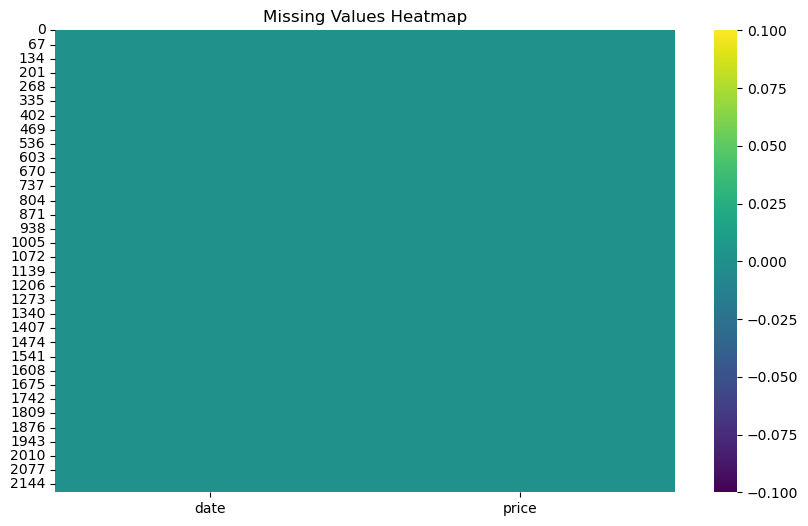

In [14]:
# Visualizing the missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(gold.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Analysis :
- Using a heatmap to visualize correlations between numerical variables

In [15]:
correlation_matrix = gold.corr()

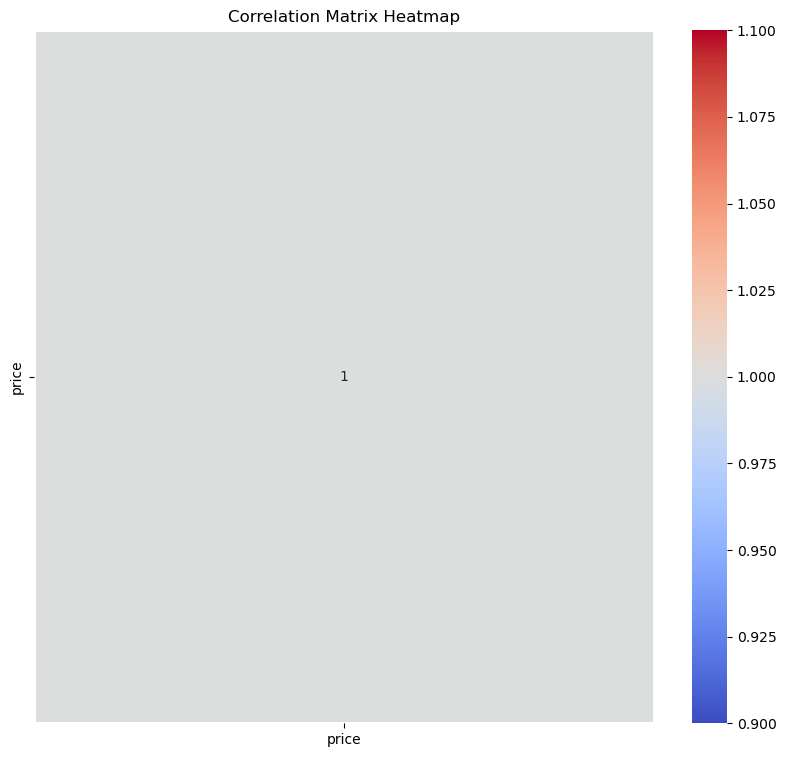

In [16]:
# Visualize the correlation matrix
plt.figure(figsize=(10,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth= 1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Histograms

Plotting histogram for: price


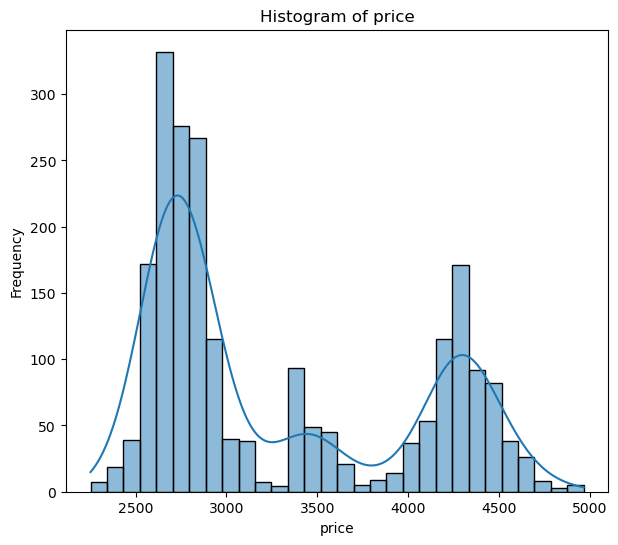

In [17]:
# Histograms for numerical columns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Example DataFrame creation (replace this with your actual DataFrame)
# gold = pd.read_csv('your_data.csv')  # Load your DataFrame

# Check numerical columns
numerical_columns = gold.select_dtypes(include=['int64', 'float64']).columns

# Loop through numerical columns and plot histograms
for column in numerical_columns:
    print(f"Plotting histogram for: {column}")
    plt.figure(figsize=(7, 6))
    sns.histplot(gold[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')  # Use 'Frequency' instead of 'price'
    plt.show()

Plotting histogram for: date


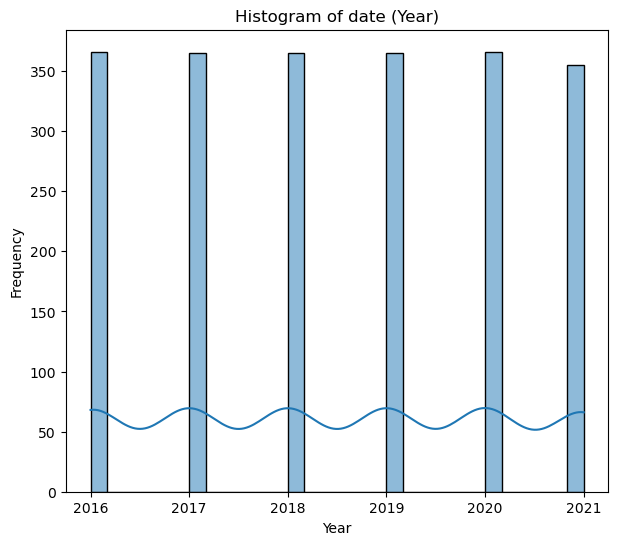

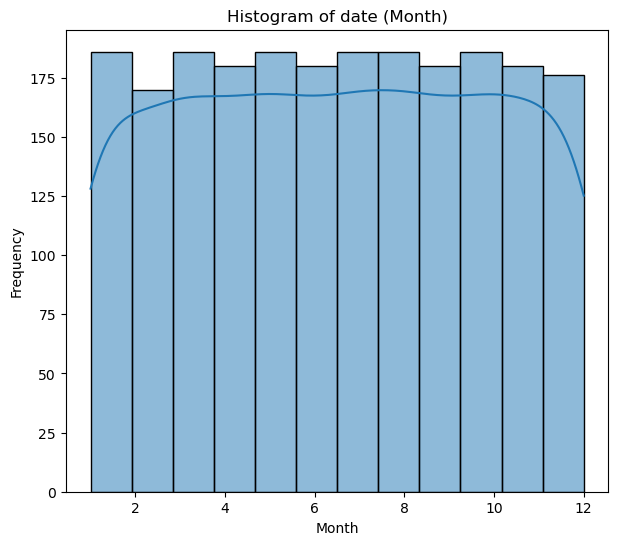

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Example DataFrame creation (replace this with your actual DataFrame)
# gold = pd.read_csv('your_data.csv')  # Load your DataFrame

# Check for date columns
date_columns = gold.select_dtypes(include=['datetime64[ns]']).columns

# Loop through date columns and plot histograms
for column in date_columns:
    print(f"Plotting histogram for: {column}")

    # Extract the desired date component (e.g., year)
    gold['year'] = gold[column].dt.year

    # Create a histogram for the year
    plt.figure(figsize=(7, 6))
    sns.histplot(gold['year'], bins=30, kde=True)
    plt.title(f'Histogram of {column} (Year)')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

    # If you want to plot by month as well:
    gold['month'] = gold[column].dt.month

    plt.figure(figsize=(7, 6))
    sns.histplot(gold['month'], bins=12, kde=True)
    plt.title(f'Histogram of {column} (Month)')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.show()

    # Clean up the temporary columns
    gold.drop(['year', 'month'], axis=1, inplace=True)

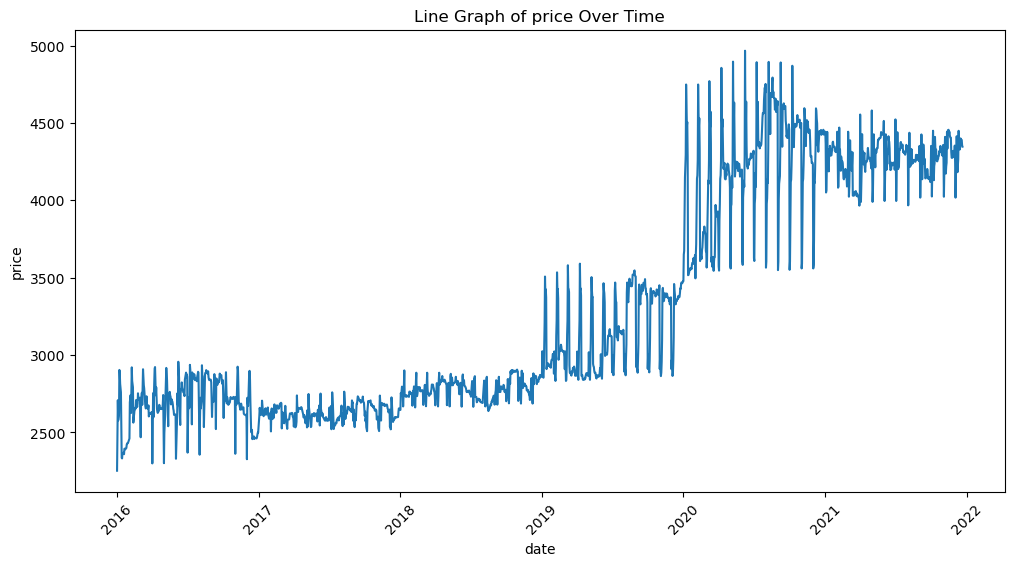

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

# Ensure inline plotting
%matplotlib inline

# Example DataFrame creation (replace this with your actual DataFrame)
# gold = pd.read_csv('your_data.csv')  # Load your DataFrame

# Assuming you have a date column and a price column
date_column = 'date'  # Replace with your actual date column name
price_column = 'price'  # Replace with your actual price column name

# Ensure date column is in datetime format
gold[date_column] = pd.to_datetime(gold[date_column])

# Group by date and calculate the average price (or sum, count, etc., as needed)
daily_price = gold.groupby(date_column)[price_column].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_price[date_column], y=daily_price[price_column])
plt.title(f'Line Graph of {price_column} Over Time')
plt.xlabel(date_column)
plt.ylabel(price_column)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Boxplot

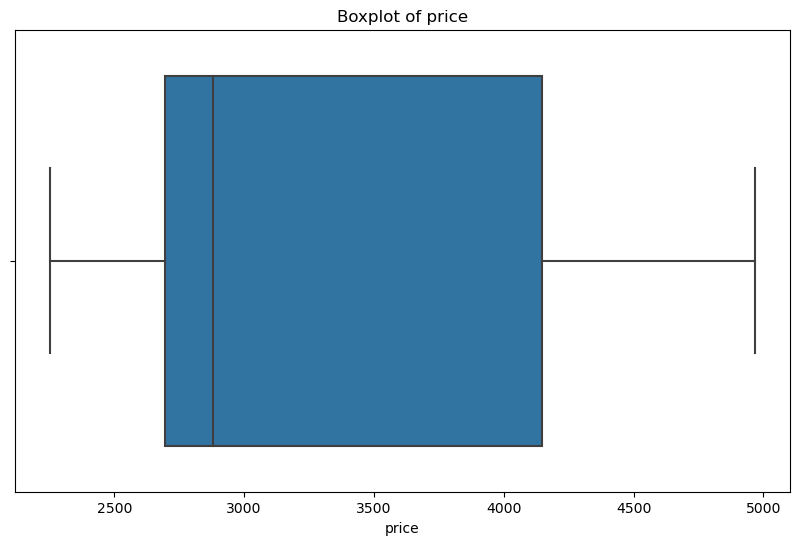

In [20]:
# Boxplots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=gold[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

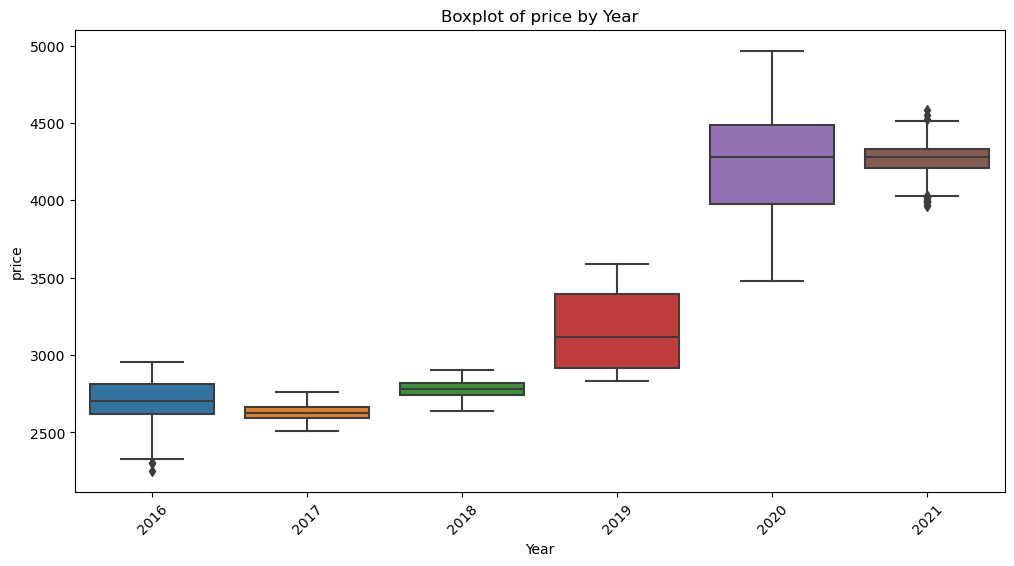

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Example DataFrame creation (replace this with your actual DataFrame)
# gold = pd.read_csv('your_data.csv')  # Load your DataFrame

# Assuming you have a date column and a price column
date_column = 'date'  # Replace with your actual date column name
price_column = 'price'  # Replace with your actual price column name

# Ensure date column is in datetime format
gold[date_column] = pd.to_datetime(gold[date_column])

# Extract the year from the date column
gold['year'] = gold[date_column].dt.year

# Boxplot of price by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y=price_column, data=gold)
plt.title(f'Boxplot of {price_column} by Year')
plt.xlabel('Year')
plt.ylabel(price_column)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

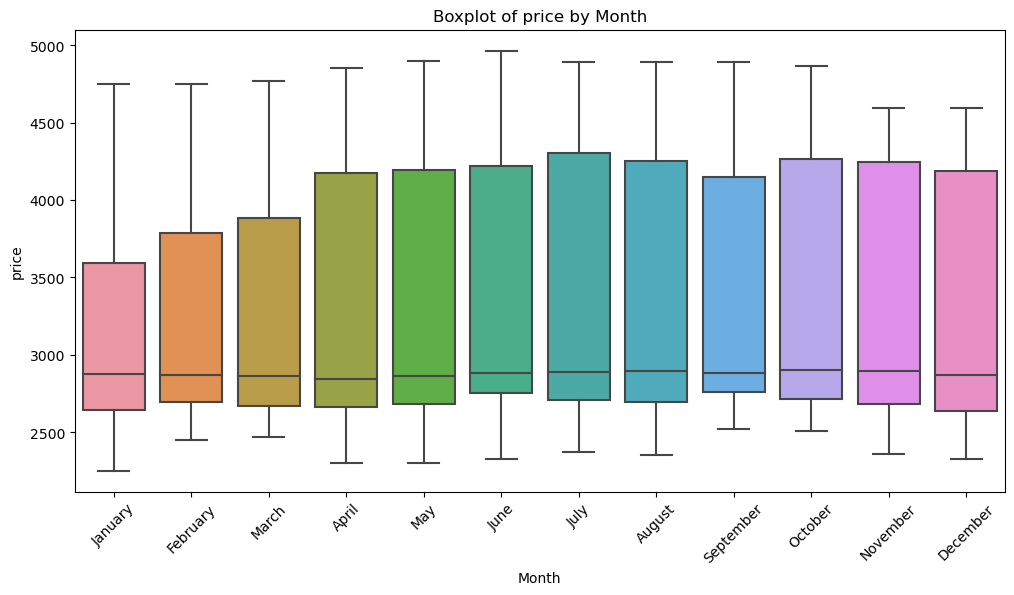

In [22]:
# Extract the month from the date column
gold['month'] = gold[date_column].dt.month_name()  # Use month name for better readability

# Boxplot of price by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y=price_column, data=gold, order=sorted(gold['month'].unique(), key=lambda x: pd.to_datetime(x, format='%B')))
plt.title(f'Boxplot of {price_column} by Month')
plt.xlabel('Month')
plt.ylabel(price_column)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Bar Chart

In [23]:
# #storing categorical columns in a variable just like we did for numerical_columns
categorical_columns = gold.select_dtypes(include='object').columns.tolist()

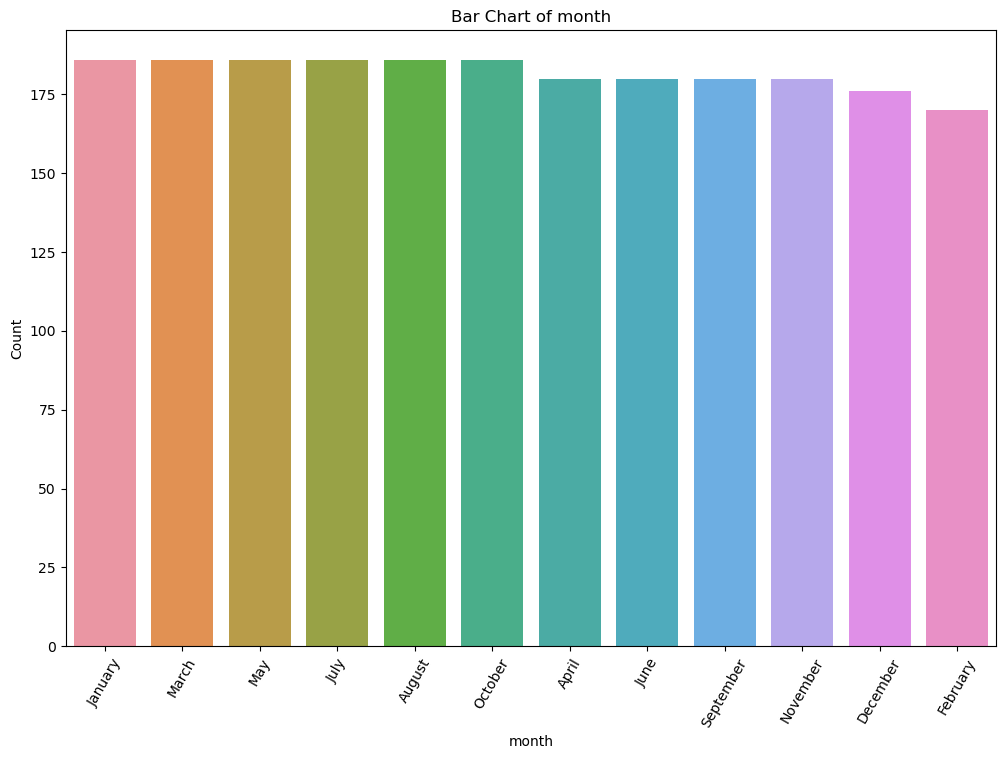

In [24]:
# Ensure inline plotting
%matplotlib inline

# Bar charts for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(12, 8))  # Adjusted size
    sns.countplot(x=gold[column], order=gold[column].value_counts().index[:20])  # Limit to top 20 categories
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=60)
    plt.show()

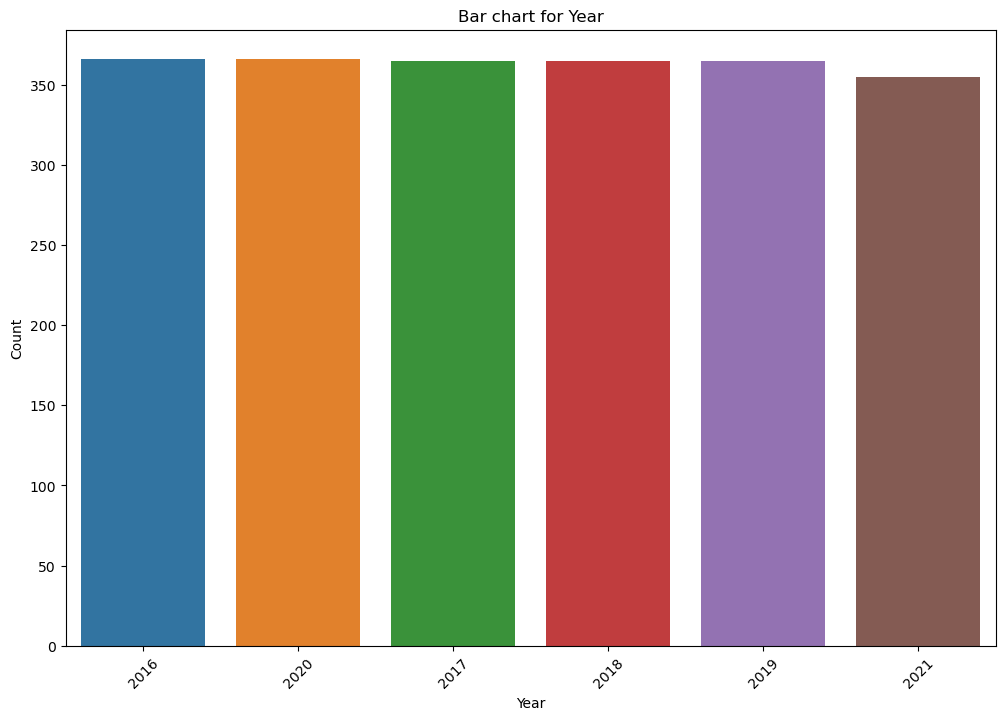

In [25]:
# Assuming you have a date column
date_column = 'date' 

# Ensure date column is in datetime format
gold[date_column] = pd.to_datetime(gold[date_column])

# Extract the year from the date column
gold['year'] = gold[date_column].dt.year

# Bar chart of counts by year
plt.figure(figsize=(12, 8))
sns.countplot(x='year', data=gold, order=gold['year'].value_counts().index)
plt.title('Bar chart for Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

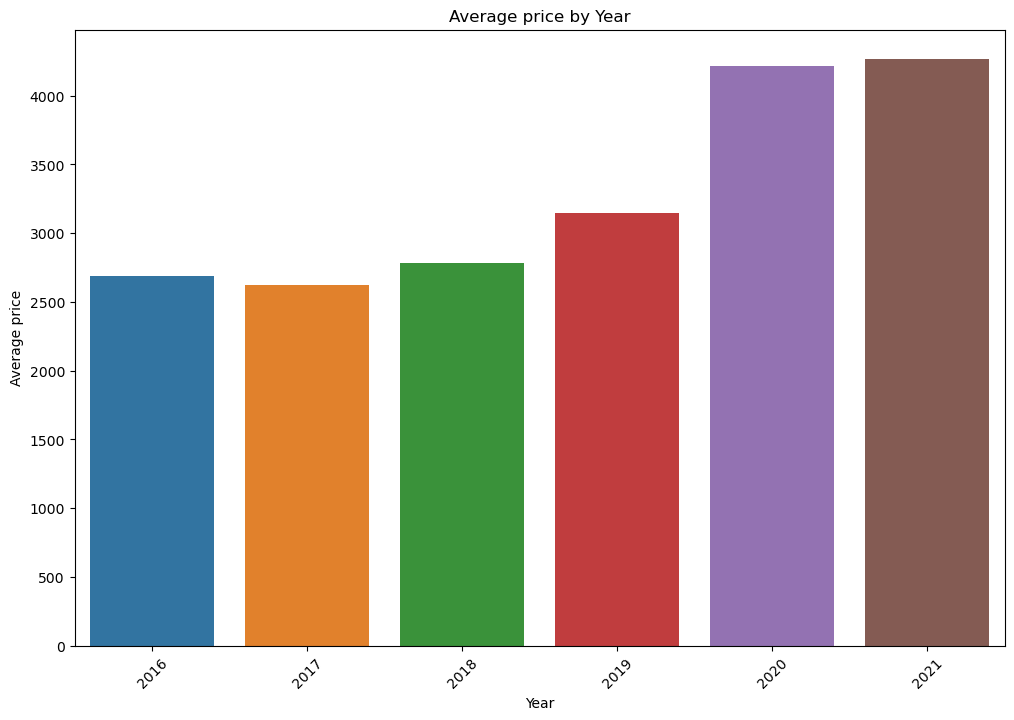

In [26]:
# Assuming you have a date column and a price column
date_column = 'date'  # Replace with your actual date column name
price_column = 'price'  # Replace with your actual price column name

# Ensure date column is in datetime format
gold[date_column] = pd.to_datetime(gold[date_column])

# Extract the year from the date column
gold['year'] = gold[date_column].dt.year

# Group by year and calculate the average price
average_price_per_year = gold.groupby('year')[price_column].mean().reset_index()

# Bar chart of average price by year
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y=price_column, data=average_price_per_year)
plt.title(f'Average {price_column} by Year')
plt.xlabel('Year')
plt.ylabel(f'Average {price_column}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

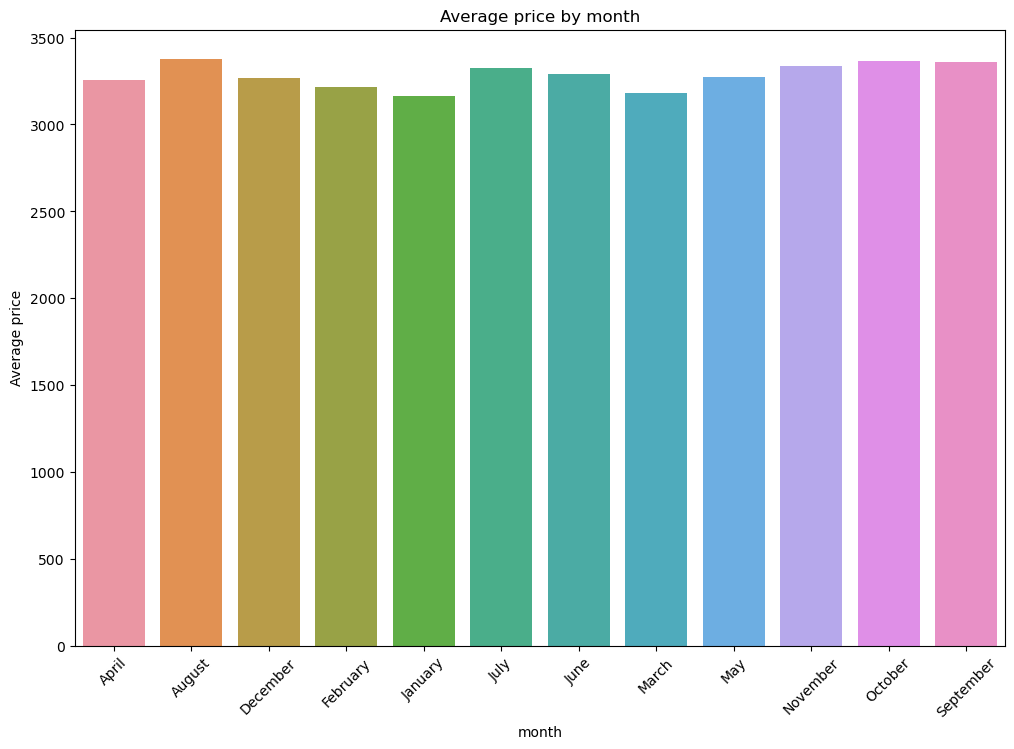

In [27]:
# Assuming you have a date column and a price column
date_column = 'date'  # Replace with your actual date column name
price_column = 'price'  # Replace with your actual price column name

# Ensure date column is in datetime format
gold[date_column] = pd.to_datetime(gold[date_column])

# Extract the year from the date column
gold['year'] = gold[date_column].dt.year

# Group by year and calculate the average price
average_price_per_month = gold.groupby('month')[price_column].mean().reset_index()

# Bar chart of average price by year
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y=price_column, data=average_price_per_month)
plt.title(f'Average {price_column} by month')
plt.xlabel('month')
plt.ylabel(f'Average {price_column}')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Model Building for gold prices

In [28]:
pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


## Visualizing the data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [30]:
# Reload the dataset with proper column names (if 'date' is the first column)
gold = pd.read_csv(r'C:\Users\Aabshaar\Downloads\Gold_data (1).csv')

# Convert 'date' column to datetime and set it as the index
gold['date'] = pd.to_datetime(gold['date'])
gold.set_index('date', inplace=True)

# Resample the data to monthly average prices
gold_monthly_avg = gold['price'].resample('M').mean()

# Display the first few rows of the resampled data
print(gold_monthly_avg.head())

date
2016-01-31    2495.832258
2016-02-29    2688.703448
2016-03-31    2682.854839
2016-04-30    2677.790000
2016-05-31    2677.650000
Freq: M, Name: price, dtype: float64


In [31]:
result = adfuller(gold['price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.30990365704573897
p-value: 0.9240899189086011


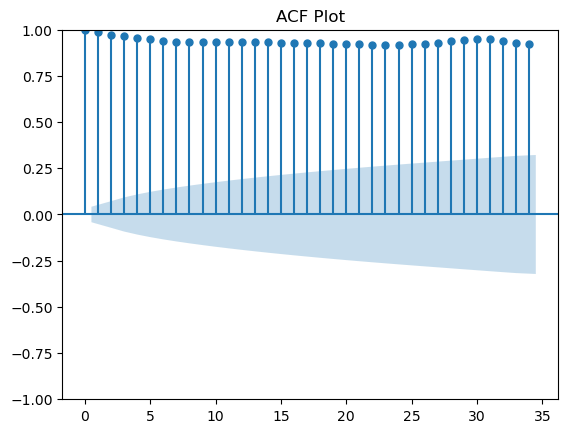

C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


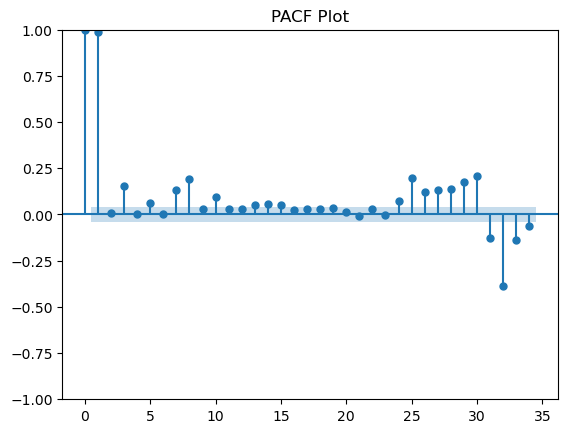

In [32]:
plot_acf(gold['price'])
plt.title('ACF Plot')
plt.show()

plot_pacf(gold['price'])
plt.title('PACF Plot')
plt.show()

## Arima Model Building

In [33]:
print(gold['price'].dtype)

float64


In [34]:
gold['price'] = pd.to_numeric(gold['price'], errors='coerce')

In [35]:
gold.dropna(subset=['price'], inplace=True)

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(gold['price'], order=(1, 1, 1))  # Adjust order as necessary
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2182
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13330.250
Date:                Sun, 20 Oct 2024   AIC                          26666.501
Time:                        17:24:54   BIC                          26683.563
Sample:                    01-01-2016   HQIC                         26672.738
                         - 12-21-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7809      0.015     53.844      0.000       0.752       0.809
ma.L1         -0.9676      0.006   -164.331      0.000      -0.979      -0.956
sigma2      1.192e+04    113.599    104.888      0.0

## Sarima Model Building

In [37]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
# Fit the SARIMA model
# p, d, q = non-seasonal parameters
# P, D, Q, s = seasonal parameters
model = SARIMAX(gold['price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust these orders as necessary
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                 2182
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13289.564
Date:                            Sun, 20 Oct 2024   AIC                          26589.128
Time:                                    17:25:00   BIC                          26617.538
Sample:                                01-01-2016   HQIC                         26599.516
                                     - 12-21-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7799      0.015     53.291      0.000       0.751       0.809
ma.L1         -0.9699      0.006   

## Sarimax Model Building

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order for SARIMA (p, d, q) and seasonal order (P, D, Q, s)
order = (1, 1, 1)  # Non-seasonal parameters
seasonal_order = (1, 1, 1, 12)  # Seasonal parameters (P, D, Q, s), where 's' is the seasonal period (12 for monthly)

# Build and fit the SARIMA model
sarima_model = SARIMAX(gold_monthly_avg, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# Summary of the SARIMA model
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -354.557
Date:                            Sun, 20 Oct 2024   AIC                            719.114
Time:                                    17:25:01   BIC                            729.501
Sample:                                01-31-2016   HQIC                           723.169
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5604      0.390     -1.436      0.151      -1.325       0.204
ma.L1          0.7957      0.268   

C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
# Example SARIMAX without exogenous variables (same as SARIMA)
sarimax_model = SARIMAX(gold_monthly_avg, order=order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit()

# Summary of the SARIMAX model
print(sarimax_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -354.557
Date:                            Sun, 20 Oct 2024   AIC                            719.114
Time:                                    17:25:01   BIC                            729.501
Sample:                                01-31-2016   HQIC                           723.169
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5604      0.390     -1.436      0.151      -1.325       0.204
ma.L1          0.7957      0.268   

C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
import pandas as pd

# Reload the dataset
gold = pd.read_csv(r'C:\Users\Aabshaar\Downloads\Gold_data (1).csv')

# Convert 'date' column to datetime and set it as the index
gold['date'] = pd.to_datetime(gold['date'])
gold.set_index('date', inplace=True)

# Group by the month (ignoring the year) and calculate the average price for each month
gold['month'] = gold.index.month
monthly_avg = gold.groupby('month')['price'].mean()

# Display the average price for each month
print(monthly_avg)

month
1     3165.796326
2     3214.831471
3     3178.425000
4     3253.865833
5     3270.410753
6     3291.177500
7     3326.265054
8     3377.567473
9     3359.573889
10    3366.540323
11    3337.501389
12    3267.933996
Name: price, dtype: float64


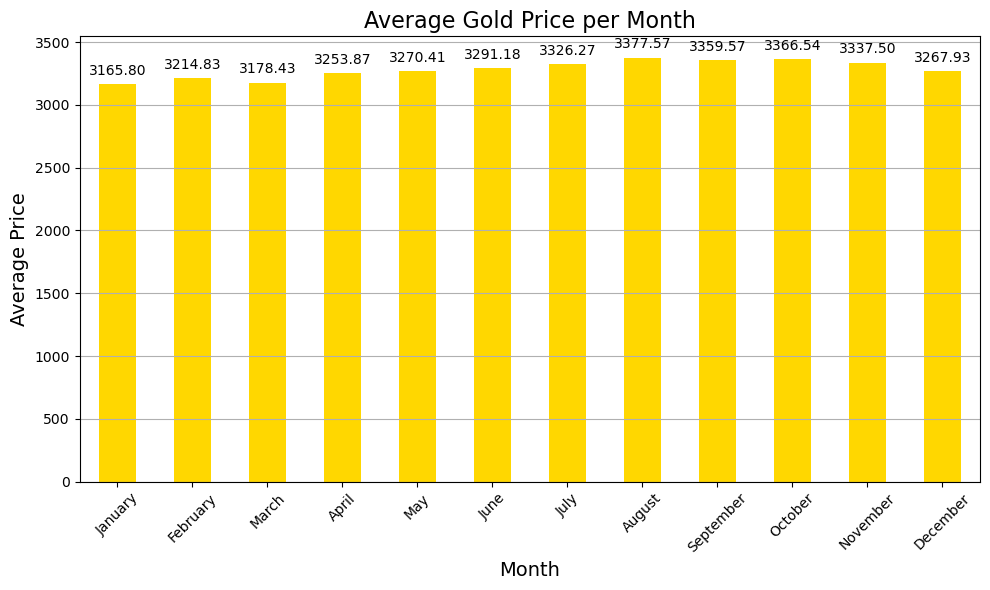

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
gold = pd.read_csv(r'C:\Users\Aabshaar\Downloads\Gold_data (1).csv')

# Convert 'date' column to datetime and set it as the index
gold['date'] = pd.to_datetime(gold['date'])
gold.set_index('date', inplace=True)

# Group by the month (ignoring the year) and calculate the average price for each month
gold['month'] = gold.index.month
monthly_avg = gold.groupby('month')['price'].mean()

# Create a bar plot for the average price per month
plt.figure(figsize=(10, 6))
monthly_avg.index = [pd.to_datetime(f'2020-{month}-01').strftime('%B') for month in monthly_avg.index]  # Convert month index to month names
bars = monthly_avg.plot(kind='bar', color='gold')

# Add titles and labels
plt.title('Average Gold Price per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display values on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,  # Adjust the position
             f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#pip install pmdarima

In [44]:
gold= pd.read_csv(r'C:\Users\Aabshaar\Downloads\Gold_data (1).csv')
gold

,date,price
0,1/1/2016,2252.60
1,1/2/2016,2454.50
2,1/3/2016,2708.10
3,1/4/2016,2577.80
4,1/5/2016,2597.75
...,...,...
2177,12/17/2021,4394.40
2178,12/18/2021,4389.50
2179,12/19/2021,4389.50
2180,12/20/2021,4354.10


In [45]:
# Convert 'date' column to datetime and set it as index
gold['date'] = pd.to_datetime(gold['date'])
gold.set_index('date', inplace=True)

# Resample the data to monthly average prices
gold_monthly_avg = gold['price'].resample('M').mean()

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the ARIMA model
arima_model = ARIMA(gold_monthly_avg, order=(1, 1, 1))  # Adjust (p, d, q)
arima_fit = arima_model.fit()

# Forecast and evaluate
arima_forecast = arima_fit.predict(start=len(gold_monthly_avg), end=len(gold_monthly_avg) + 11, typ='levels')
arima_rmse = np.sqrt(mean_squared_error(gold_monthly_avg, arima_fit.fittedvalues))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 308.463865596752


In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
sarima_model = SARIMAX(gold_monthly_avg, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust (p, d, q) and seasonal_order
sarima_fit = sarima_model.fit()

# Forecast and evaluate
sarima_forecast = sarima_fit.predict(start=len(gold_monthly_avg), end=len(gold_monthly_avg) + 11, typ='levels')
sarima_rmse = np.sqrt(mean_squared_error(gold_monthly_avg, sarima_fit.fittedvalues))
print(f"SARIMA RMSE: {sarima_rmse}")

SARIMA RMSE: 338.0540284527645


C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
# Define the SARIMAX model (without exogenous variables for now)
sarimax_model = SARIMAX(gold_monthly_avg, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust accordingly
sarimax_fit = sarimax_model.fit()

# Forecast and evaluate
sarimax_forecast = sarimax_fit.predict(start=len(gold_monthly_avg), end=len(gold_monthly_avg) + 11, typ='levels')
sarimax_rmse = np.sqrt(mean_squared_error(gold_monthly_avg, sarimax_fit.fittedvalues))
print(f"SARIMAX RMSE: {sarimax_rmse}")

SARIMAX RMSE: 338.0540284527645


C:\Users\Aabshaar\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create lag features
gold_monthly_avg = gold_monthly_avg.to_frame()  # Convert series to DataFrame
gold_monthly_avg['lag1'] = gold_monthly_avg['price'].shift(1)
gold_monthly_avg.dropna(inplace=True)

# Define features and target
X = gold_monthly_avg[['lag1']]  # You can add more lags if needed
y = gold_monthly_avg['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forecast and evaluate
rf_forecast = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_forecast))
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 116.02163876006043


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Fit the model
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting RMSE: {gb_rmse}")

Gradient Boosting RMSE: 134.52541595054694


In [52]:
# Print RMSE of all models
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"SARIMAX RMSE: {sarimax_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Gradient Boosting RMSE: {gb_rmse}")


# Compare the models
model_performance = {
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'SARIMAX': sarimax_rmse,
    'Random Forest': rf_rmse,
    'Gradient Boosting': gb_rmse
}

best_model = min(model_performance, key=model_performance.get)
print(f"The best model based on RMSE is: {best_model}")

ARIMA RMSE: 308.463865596752
SARIMA RMSE: 338.0540284527645
SARIMAX RMSE: 338.0540284527645
Random Forest RMSE: 116.02163876006043
Gradient Boosting RMSE: 134.52541595054694
The best model based on RMSE is: Random Forest


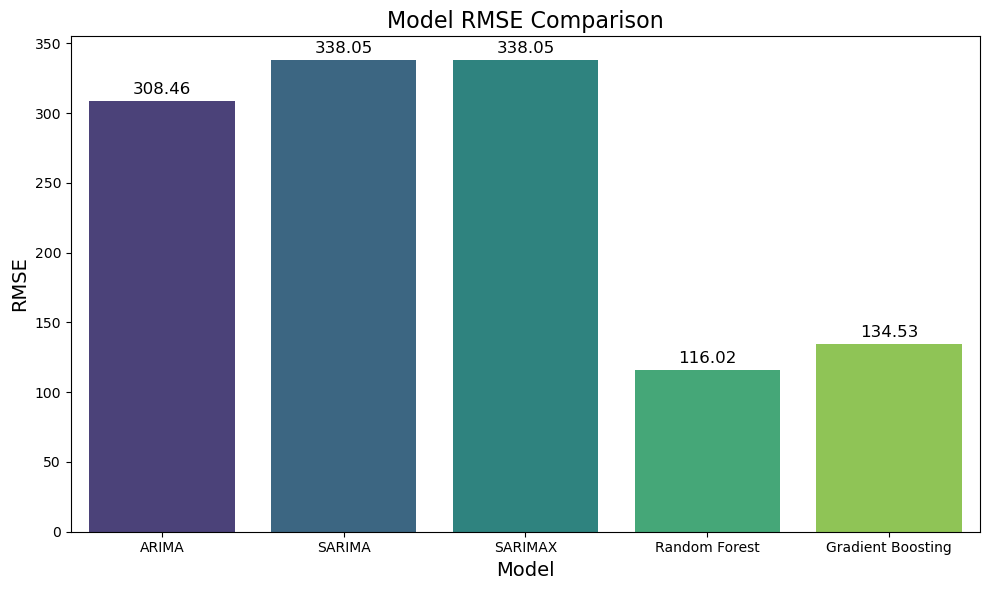

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance data
model_performance = {
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'SARIMAX': sarimax_rmse,
    'Random Forest': rf_rmse,
    'Gradient Boosting': gb_rmse
}

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="viridis")

# Add titles and labels
plt.title('Model RMSE Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

# Display the values on top of the bars
for i, v in enumerate(model_performance.values()):
    plt.text(i, v + 5, f'{v:.2f}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion

- Here's a summary of the RMSE results with a clear format:

|Model|RMSE|
|-----|----|
|ARIMA	|308.46|
|SARIMA|338.05|
|SARIMAX |338.05|
|Random Forest|116.02|
|Gradient Boosting|134.53|

- Conclusion:
  
 The Random Forest model exhibits the best predictive performance with the lowest RMSE of 116.02.
 Gradient Boosting follows with an RMSE of 134.53, which is still significantly better than ARIMA, SARIMA, and SARIMAX.
 The traditional time series models (ARIMA, SARIMA, SARIMAX) have higher RMSE values, indicating poorer predictive accuracy compared to the ensemble methods.

- In summary, the Random Forest model is the most effective choice for this dataset based on RMSE.

In [56]:
#pip install streamlit


In [57]:
# Saving the model to a file
import joblib

joblib.dump(rf_model, 'forecasting gold prices.pkl')

print("Model saved successfully!")

Model saved successfully!
